<a href="https://colab.research.google.com/github/adrianacarto/DT-with-Python/blob/main/11_Page_Views_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discovery project - page views

### Adapted from freeCodeCamp [project](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer)

For this project you will visualise data that has values recorded against time.  You will use Pandas and Matplotlib to visualise the dataset which contains the number of page views each day on the freeCodeCamp.org forum between 2016-05-09 and 2019-12-03. You will create a line chart, a bar chart, and some box plots to create visualisations that will help you understand the patterns in visits to the forum and identify growth over various time ranges (yearly, monthly, etc).


The dataset can be read from here: "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"

Visualise and analyse the data in the following ways:



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 

url =  "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"        
df = pd.read_csv(url)

info = df.info()
head = df.head()
describe = df.describe()

display(info,describe, head, df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


None

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


date     object
value     int64
dtype: object

### 1.  a line plot, similar to this 
---
![example](https://drive.google.com/uc?id=1Cic5SybYEc86rqbwTCZzyEf4rzQNWJLP) (taken from the freeCodeCamp site) and with similar labelling.

To prepare the data for the line plot you might do the following:  

*  convert the `date` column to **datetime** type 
*  create 3 new columns for `year`, `month` and `day` (use `dt.year, dt.strftime to get the month name, dt.day`)
*  set the index to the **date** column.
*  clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.


In [ ]:
import datetime
import numpy as np
import seaborn as sns

  #initial attempt: date_column = datetime.datetime(df["date"])

def convert_datetime () :
  #date_column = pd.to_datetime(df["date"])
  df["datetime"] = pd.to_datetime(df.date)
  #df["datetime"] = pd.to_datetime(df["date"])

  df["year"] = df["datetime"].dt.year
  df["month"] = df["datetime"].dt.strftime("%B")
  #month = date_column.dt.month
  df["day"] = df["datetime"].dt.day
 
convert_datetime ()

#set the index to the date column
df.set_index('date', inplace=True)

display(df.head(), df.dtypes, df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   value     1304 non-null   int64         
 1   datetime  1304 non-null   datetime64[ns]
 2   year      1304 non-null   int64         
 3   month     1304 non-null   object        
 4   day       1304 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 61.1+ KB


,value,datetime,year,month,day
date,,,,,
2016-05-09,1201,2016-05-09,2016,May,9
2016-05-10,2329,2016-05-10,2016,May,10
2016-05-11,1716,2016-05-11,2016,May,11
2016-05-12,10539,2016-05-12,2016,May,12
2016-05-13,6933,2016-05-13,2016,May,13


value                int64
datetime    datetime64[ns]
year                 int64
month               object
day                  int64
dtype: object

None

In [ ]:
def remove_outliers(df, column) : 

  Q3 = df[column].quantile(0.75) 
  Q1 = df[column].quantile(0.25)

  IQR = Q3 - Q1

  upper_outlier = Q3 + 1.5 * IQR
  lower_outlier = Q1 - 1.5 * IQR
  print(upper_outlier, lower_outlier)

  #use filter to take out outliers
  df_filter = df[df[column]>lower_outlier] 
  df_normal = df_filter[df_filter[column]<upper_outlier]      
  return df_normal
     
df_normal = remove_outliers(df,"value") 
df_normal.info()
df_normal.tail()

156070.875 -36430.125
<class 'pandas.core.frame.DataFrame'>
Index: 1255 entries, 2016-05-09 to 2019-12-01
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   value     1255 non-null   int64         
 1   datetime  1255 non-null   datetime64[ns]
 2   year      1255 non-null   int64         
 3   month     1255 non-null   object        
 4   day       1255 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 58.8+ KB


,value,datetime,year,month,day
date,,,,,
2019-11-20,151733,2019-11-20,2019,November,20
2019-11-23,146658,2019-11-23,2019,November,23
2019-11-24,138875,2019-11-24,2019,November,24
2019-11-30,141161,2019-11-30,2019,November,30
2019-12-01,142918,2019-12-01,2019,December,1


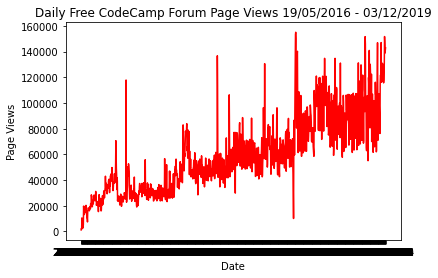

In [ ]:
def lineplot_chart ():
  value_data = df_normal["value"]
  chart = sns.lineplot(data=value_data, color='red')
  plt.title("Daily Free CodeCamp Forum Page Views 19/05/2016 - 03/12/2019")
  sns.set(rc = {'figure.figsize':(15,8)})
  plt.xlabel("Date")
  plt.ylabel("Page Views")
lineplot_chart()


###2. a bar chart similar to this 
---

![example](https://drive.google.com/uc?id=15-tIwheaCIcUsx6jfg5DBAWFVGE4bHzK) (taken from the freeCodeCamp site) and with similar labelling.  It should show average daily page views for each month grouped by year. 

To prepare the data for the bar chart you should create a pivot table and can use pivot_table_name.plot(kind='bar')


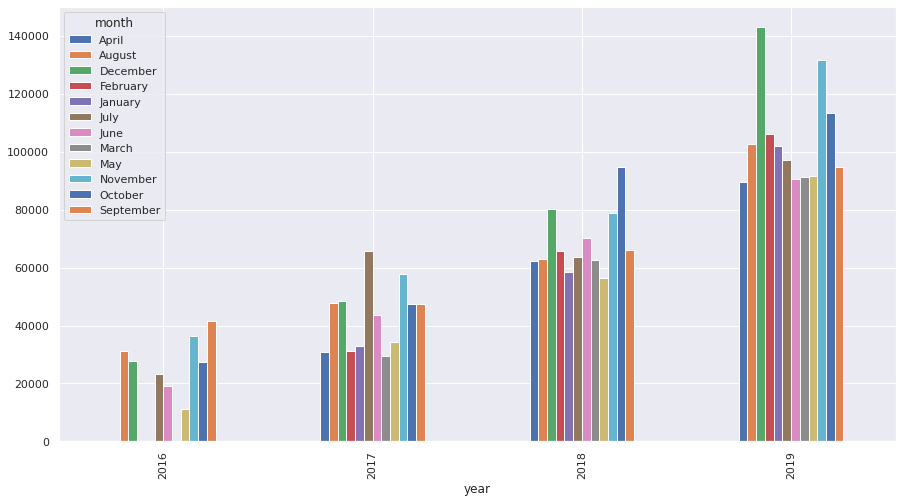

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

#get month´s means 
df_normal.tail()

#df_normal_np = np.array(df_normal)
#month_group = df_normal["month"].mean()
#group dataframe by year
#years_group = df_normal.groupby(["year"])
#labels = (df_normal.keys())
#labels = ["2016", "2017", "2018", "2019"]
#create pivot table
#table = pd.pivot_table(df_normal, values=["value"], index=years_group, columns=month_group, aggfunc=np.mean)

table = pd.pivot_table(df_normal, values = "value", index = "year", columns = "month", aggfunc = np.mean )
table.plot(kind='bar')



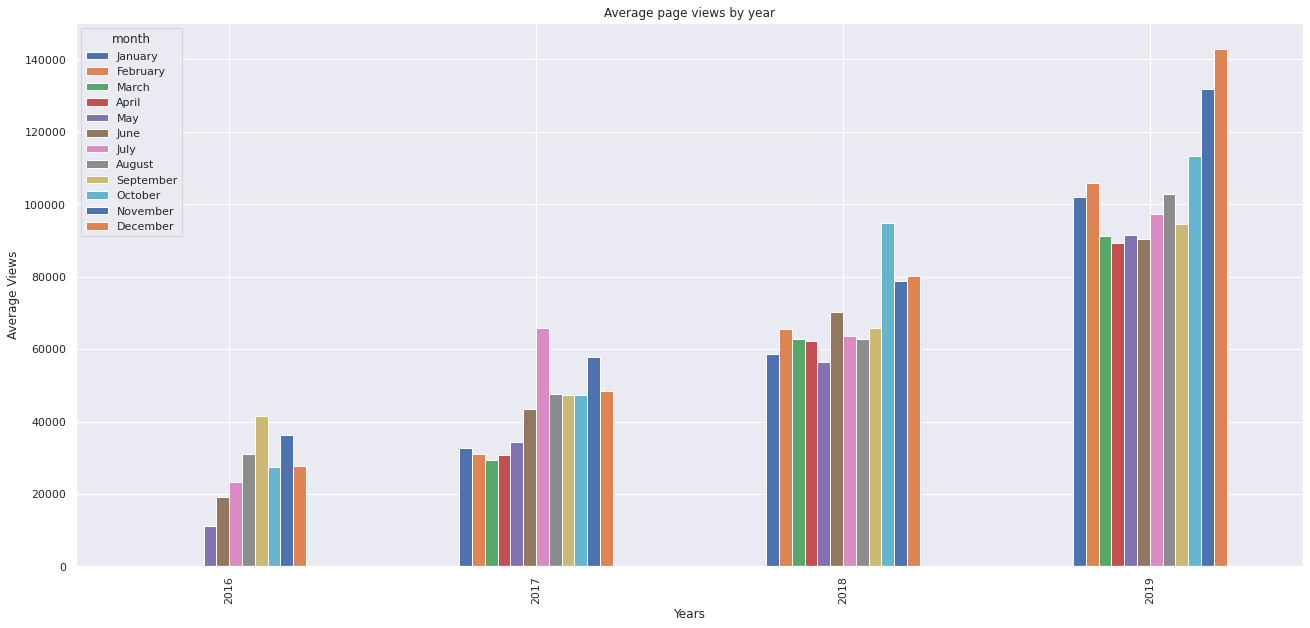

In [ ]:

months_categories = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df_normal["month"] = pd.Categorical(df_normal["month"], categories = months_categories)
sorted_filtered_value = df_normal.sort_values(by = "month")
sorted_filtered_value

pivot_table = pd.pivot_table(sorted_filtered_value, values = "value", index = "year", columns = "month", aggfunc = np.mean )
pivot_table

from datetime import datetime, timezone
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import linregress
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(22,10)})
pivot_table.plot(kind='bar', xlabel = 'Years', ylabel = 'Average Views', title = 'Average page views by year')
#legend(bbox_to_anchor=(1.2, 1)
pivot_table.plot; 

###3.  a set of box plots similar to this
---
 ![example](https://drive.google.com/uc?id=1kqhGKnA0Ybtyw2cew67u3_ogMS9Fb1hM)

These box plots should show how the values are distributed within a given year or month and how it compares over time. 


###4.  predict the number of page views in the year 2020 based on the data up to 2019
---

*  perform a linear regression and create a line of best fit 
*  predict the page views in the year 2020, 2025 and 2030 if identified trends persist. 


# Reflect

What caused the biggest problems?
How did you solve these problems?